In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("listings.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [3]:
df.shape
df.info()
df.describe(include='all').transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7907.0,NaN,NaN,NaN,23388624.629569,10164162.065944,49091.0,15821800.5,24706270.0,32348500.0,38112762.0
name,7905,7457,Luxury hostel with in-cabin locker - Single mixed,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,7907.0,NaN,NaN,NaN,91144807.405337,81909095.305465,23666.0,23058075.0,63448912.0,155381142.0,288567551.0
host_name,7907,1833,Jay,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,7907,5,Central Region,6309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,7907,43,Kallang,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,7907.0,NaN,NaN,NaN,1.314192,0.030577,1.24387,1.295795,1.31103,1.32211,1.45459
longitude,7907.0,NaN,NaN,NaN,103.848787,0.043675,103.64656,103.835825,103.84941,103.872535,103.97342
room_type,7907,3,Entire home/apt,4132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,7907.0,NaN,NaN,NaN,169.332996,340.187599,0.0,65.0,124.0,199.0,10000.0


In [4]:

print(df.isnull().sum())
df = df.drop_duplicates()

df['price'] = df['price'].fillna(df['price'].median())

df.info()


id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id

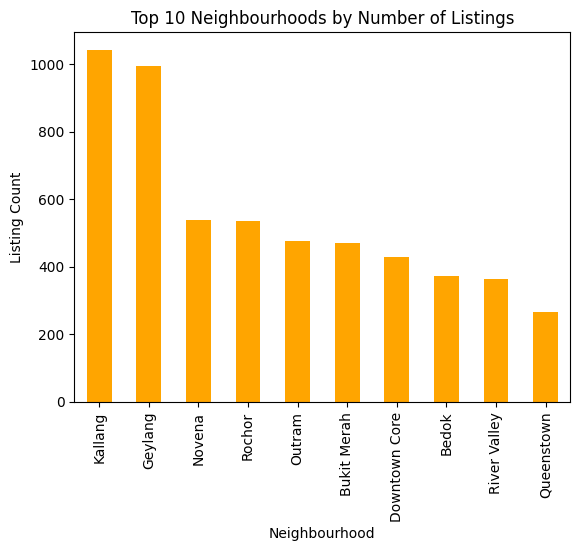

In [5]:
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)
top_neighbourhoods.plot(kind='bar', color='orange')
plt.title("Top 10 Neighbourhoods by Number of Listings")
plt.xlabel("Neighbourhood")
plt.ylabel("Listing Count")
plt.show()
#Shows which neighbourhoods are most popular for Airbnb listings.

In [6]:
df['minimum_nights']

,minimum_nights
0,180
1,90
2,6
3,1
4,1
...,...
7902,3
7903,6
7904,30
7905,14


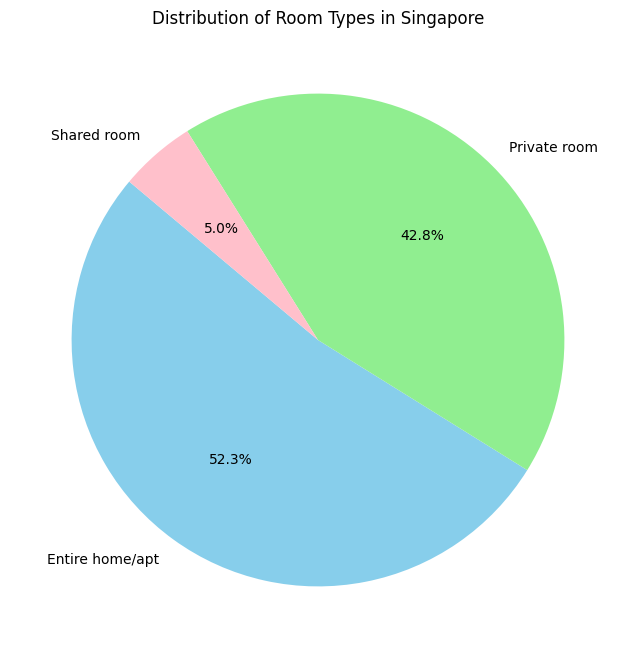

In [7]:
room_counts = df['room_type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    room_counts,
    labels=room_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue','lightgreen','pink','orange']
)
plt.title("Distribution of Room Types in Singapore")
plt.show()

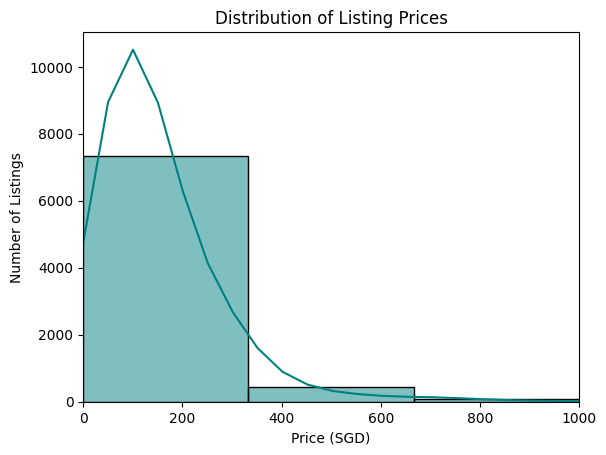

In [8]:
sns.histplot(df['price'], bins=30, kde=True, color='teal')
plt.title("Distribution of Listing Prices")
plt.xlabel("Price (SGD)")
plt.ylabel("Number of Listings")
plt.xlim(0, 1000)
plt.show()
#It shows how many listings are there for a price


/tmp/ipython-input-1978420442.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df, palette='coolwarm')


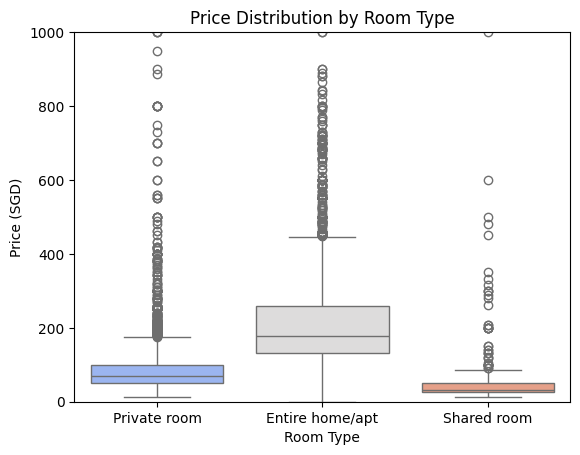

In [10]:
sns.boxplot(x='room_type', y='price', data=df, palette='coolwarm')
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price (SGD)")
plt.ylim(0, 1000)
plt.show()
